In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [6]:

# Load and pre-process the data
df = pd.read_csv('BTC-USD.csv')
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-02-15,44575.203130
2022-02-16,43961.859380
2022-02-17,40538.011720


In [7]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df.shape

(2713, 1)

In [9]:
# Split the data into training and test sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]
print("train", train.shape)
print("test", test.shape)

train (2170, 1)
test (543, 1)


In [13]:
# Convert the data into a 3D array (a sequence of sequences of timesteps)
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length - 1):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 365
X_train, y_train = create_sequences(train, sequence_length)
X_test, y_test = create_sequences(test, sequence_length)
print("X_train" , X_train.shape)
print("y_train", y_train.shape)
print ("x_test",X_test.shape)
print ("y_test",y_test.shape)

X_train (1804, 365, 1)
y_train (1804, 1)
x_test (177, 365, 1)
y_test (177, 1)


In [15]:
# Build and compile the model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Reshape the input data for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (1804, 365, 1)
X_test (177, 365, 1)


In [17]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
57/57 [==============================] - 22s 237ms/step - loss: 0.0019
Epoch 2/100
57/57 [==============================] - 13s 224ms/step - loss: 1.4080e-04
Epoch 3/100
57/57 [==============================] - 13s 228ms/step - loss: 1.2777e-04
Epoch 4/100
57/57 [==============================] - 13s 223ms/step - loss: 9.9707e-05
Epoch 5/100
57/57 [==============================] - 13s 221ms/step - loss: 9.5815e-05
Epoch 6/100
57/57 [==============================] - 13s 228ms/step - loss: 8.6844e-05
Epoch 7/100
57/57 [==============================] - 13s 220ms/step - loss: 8.1503e-05
Epoch 8/100
57/57 [==============================] - 13s 224ms/step - loss: 8.0727e-05
Epoch 9/100
57/57 [==============================] - 13s 229ms/step - loss: 7.3176e-05
Epoch 10/100
57/57 [==============================] - 12s 207ms/step - loss: 7.7904e-05
Epoch 11/100
57/57 [==============================] - 12s 210ms/step - loss: 7.2079e-05
Epoch 12/100
57/57 [=========================

In [18]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score:.4f}')


Test loss: 0.0050


In [21]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

6/6 [==============================] - 1s 115ms/step


In [20]:

# Calculate mean absolute error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calculate root mean squared error (RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Calculate mean absolute percentage error (MAPE)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [25]:
# Calculate the metrics
mae_value = mae(y_test, y_pred)
rmse_value = rmse(y_test, y_pred)
mape_value = mape(y_test, y_pred)

# Print the metric values
print(f'MAE: {mae_value:.4f}')
print(f'RMSE: {rmse_value:.4f}')
print(f'MAPE: {mape_value:.4f}')

MAE: 0.0636
RMSE: 0.0708
MAPE: 0.0835


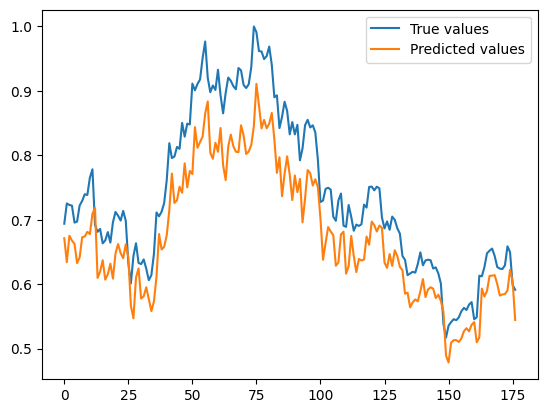

In [26]:
import matplotlib.pyplot as plt

# Plot the true values and predicted values
plt.plot(y_test, label='True values')
plt.plot(y_pred, label='Predicted values')

# Add a legend and show the plot
plt.legend()
plt.show()

In [27]:
y_pred = scaler.inverse_transform(y_pred)
y_pred

array([[45417.31 ],
       [42919.88 ],
       [45676.35 ],
       [45181.305],
       [44830.395],
       [42816.664],
       [43418.15 ],
       [45534.5  ],
       [45592.59 ],
       [46092.168],
       [45846.49 ],
       [47975.035],
       [48587.28 ],
       [41269.535],
       [41937.355],
       [43124.96 ],
       [41094.41 ],
       [41658.312],
       [42758.285],
       [41194.785],
       [43847.36 ],
       [44809.406],
       [43868.797],
       [43335.76 ],
       [44788.68 ],
       [43420.26 ],
       [38358.746],
       [37045.97 ],
       [41310.27 ],
       [42265.375],
       [39106.01 ],
       [39345.492],
       [40294.277],
       [39058.934],
       [37803.375],
       [38807.477],
       [41402.977],
       [45860.418],
       [44241.715],
       [44534.64 ],
       [45738.582],
       [48346.16 ],
       [52183.77 ],
       [49112.2  ],
       [49391.258],
       [50812.168],
       [50176.367],
       [53258.758],
       [50736.625],
       [52458.855],
